In [32]:
import psycopg2
import shapely
import shapely.wkt
import geopandas as gpd
%matplotlib inline

In [33]:
connection = psycopg2.connect(
    dbname = "sf_blocks",
    user = "",
    host = "",
    port = "",
    password = ""
)
cursor = connection.cursor()

connection.autocommit = True

In [19]:
# Kaliteli çıktı için min. 300 dpi. Screencapture olmayacak !

In [20]:
sql_bloks = "SELECT tractce10, nufus,  parsel FROM bitirme2021 WHERE nufus > 1"
blocks = gpd.read_postgis(sql_bloks, connection, geom_col='parsel').sort_values('tractce10')
blocks.head()

,tractce10,nufus,parsel
1566,010100,131,"MULTIPOLYGON (((-122.41177 37.80490, -122.4134..."
1497,010100,244,"MULTIPOLYGON (((-122.41322 37.80376, -122.4137..."
225,010100,599,"MULTIPOLYGON (((-122.41343 37.80468, -122.4150..."
222,010100,61,"MULTIPOLYGON (((-122.40994 37.80417, -122.4115..."
298,010100,38,"MULTIPOLYGON (((-122.41336 37.80441, -122.4150..."


In [ ]:
blocks.info()

In [22]:
sql_nhood = "SELECT tractce10, mahalle, alan, parsel FROM bitirme2021 WHERE mahalle = 'Mission' or  mahalle = 'Potrero Hill' or  mahalle = 'Showplace Square' or  mahalle = 'Mission Bay' or  mahalle = 'Dogpatch' or  mahalle = 'South of Market' or  mahalle = 'South Beach';"
neighborhoods = gpd.read_postgis(sql_nhood, connection, geom_col='parsel').sort_values('tractce10')
neighborhoods.head()

,tractce10,mahalle,alan,parsel
145,017601,South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40969 37.78175, -122.4098..."
330,017601,South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40881 37.77929, -122.4083..."
331,017601,South of Market,6.793254e+06,"MULTIPOLYGON (((-122.41094 37.77921, -122.4104..."
209,017601,South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40572 37.78088, -122.4071..."
333,017601,South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40716 37.77974, -122.4076..."


In [23]:
neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 589 entries, 145 to 88
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tractce10  589 non-null    object  
 1   mahalle    589 non-null    object  
 2   alan       589 non-null    float64 
 3   parsel     589 non-null    geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 23.0+ KB


In [24]:
df =  blocks.merge(neighborhoods, on="tractce10", how="inner") 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17027 entries, 0 to 17026
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tractce10  17027 non-null  object  
 1   nufus      17027 non-null  int64   
 2   parsel_x   17027 non-null  geometry
 3   mahalle    17027 non-null  object  
 4   alan       17027 non-null  float64 
 5   parsel_y   17027 non-null  geometry
dtypes: float64(1), geometry(2), int64(1), object(2)
memory usage: 931.2+ KB


In [25]:
sonuc = gpd.GeoDataFrame(df, geometry = 'parsel_x')
sonuc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17027 entries, 0 to 17026
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tractce10  17027 non-null  object  
 1   nufus      17027 non-null  int64   
 2   parsel_x   17027 non-null  geometry
 3   mahalle    17027 non-null  object  
 4   alan       17027 non-null  float64 
 5   parsel_y   17027 non-null  geometry
dtypes: float64(1), geometry(2), int64(1), object(2)
memory usage: 931.2+ KB


In [26]:
sonuc['yogunluk'] = (sonuc['nufus']*10000).div( (sonuc['alan']))*1000

In [27]:
sonuc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 17027 entries, 0 to 17026
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   tractce10  17027 non-null  object  
 1   nufus      17027 non-null  int64   
 2   parsel_x   17027 non-null  geometry
 3   mahalle    17027 non-null  object  
 4   alan       17027 non-null  float64 
 5   parsel_y   17027 non-null  geometry
 6   yogunluk   17027 non-null  float64 
dtypes: float64(2), geometry(2), int64(1), object(2)
memory usage: 1.0+ MB


In [28]:
sonuc.head()

,tractce10,nufus,parsel_x,mahalle,alan,parsel_y,yogunluk
0,017601,231,"MULTIPOLYGON (((-122.41216 37.77666, -122.4137...",South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40969 37.78175, -122.4098...",340.043216
1,017601,231,"MULTIPOLYGON (((-122.41216 37.77666, -122.4137...",South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40881 37.77929, -122.4083...",340.043216
2,017601,231,"MULTIPOLYGON (((-122.41216 37.77666, -122.4137...",South of Market,6.793254e+06,"MULTIPOLYGON (((-122.41094 37.77921, -122.4104...",340.043216
3,017601,231,"MULTIPOLYGON (((-122.41216 37.77666, -122.4137...",South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40572 37.78088, -122.4071...",340.043216
4,017601,231,"MULTIPOLYGON (((-122.41216 37.77666, -122.4137...",South of Market,6.793254e+06,"MULTIPOLYGON (((-122.40716 37.77974, -122.4076...",340.043216


In [ ]:
import matplotlib.pyplot as plt
import contextily as ctx
sonuc = sonuc.to_crs(epsg=3857)
bx = sonuc.plot(figsize=(20,20), alpha=0.18, column='yogunluk', scheme='QUANTILES', k=10, cmap='OrRd', legend=True)
fig = ctx.add_basemap(bx)
bx.set_axis_off()
plt.savefig(r'D:\Masaüstü\furkaN\TEZ\sonuc2.png', dpi=300)

In [34]:
tablo = '''CREATE TABLE bitirmeFurkan4 AS SELECT tractce10, blockid10, nufus, parsel, mahalle, alan, uzunluk, ada FROM bitirme2021'''
cursor.execute(tablo)

In [36]:
sql_yogunluk_sutun_ekle = '''ALTER TABLE bitirmeFurkan4 ADD COLUMN yogunluk real;'''
cursor.execute(sql_yogunluk_sutun_ekle)

In [37]:
sql_yogunluk = "UPDATE bitirmeFurkan4 SET yogunluk = ROUND( (NULLIF(nufus,0)*1000/alan),3)*1000"

cursor.execute(sql_yogunluk)

In [47]:
cursor.execute("SELECT tractce10,ST_AsText(parsel), yogunluk FROM bitirmeFurkan4 WHERE mahalle = 'Mission' or  mahalle = 'Potrero Hill' or  mahalle = 'Showplace Square' or  mahalle = 'Mission Bay' or  mahalle = 'Dogpatch' or  mahalle = 'South of Market' or  mahalle = 'South Beach' and nufus > 1")
print(cursor)

<cursor object at 0x000001F54BF30C88; closed: 0>


In [48]:
rows_list=[]
for tractce10, parsel, yogunluk in cursor:
    data={'tractce10':tractce10,'yogunluk':yogunluk,'geometry':shapely.wkt.loads(parsel)}
    rows_list.append(data)
gdf=gpd.GeoDataFrame(rows_list, crs='epsg:4326').set_index('tractce10')

In [50]:
connection.close()

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


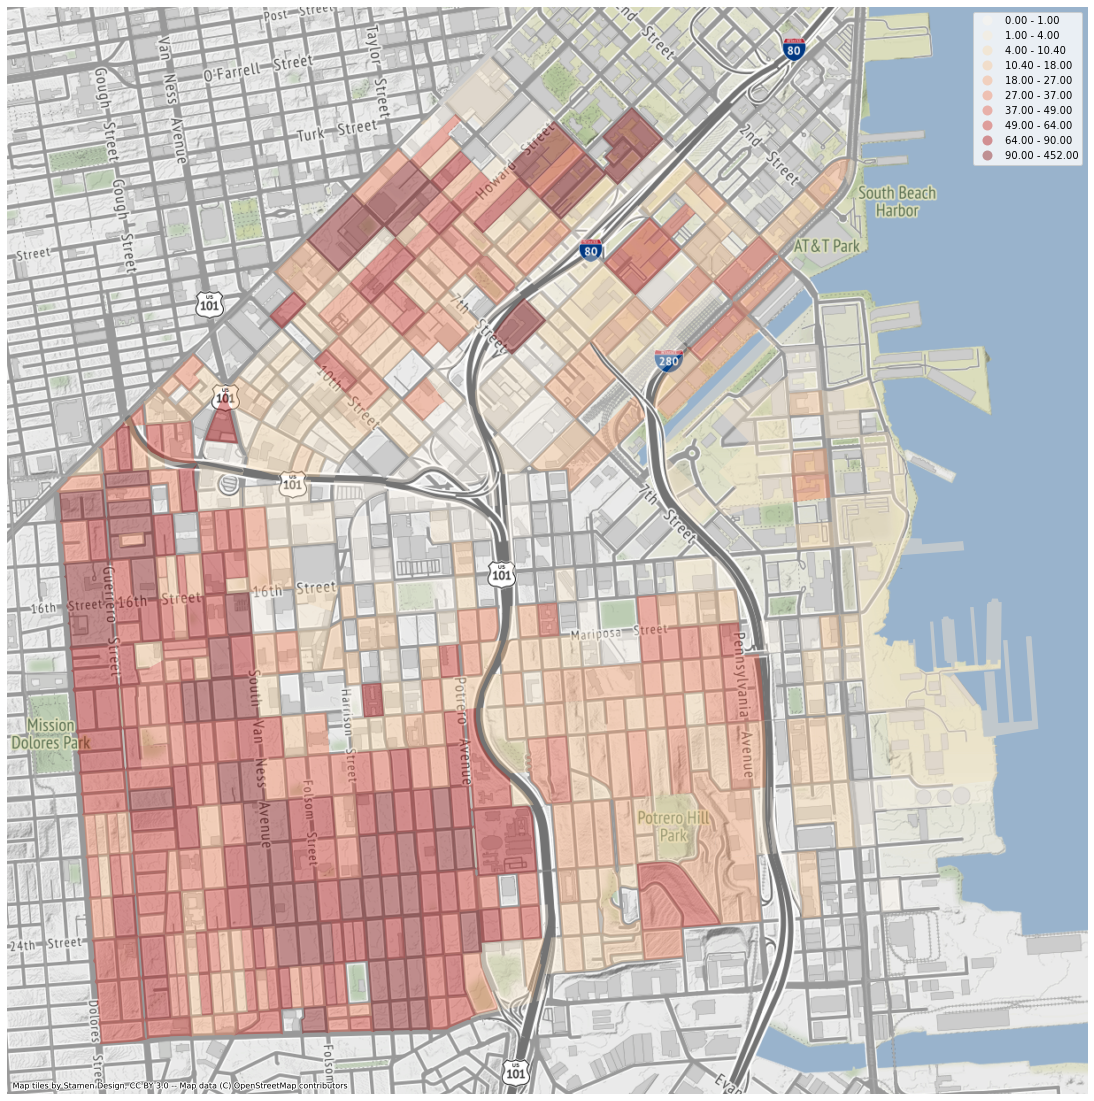

In [49]:
import matplotlib.pyplot as plt
import contextily as ctx
gdf = gdf.to_crs(epsg=3857)
bx = gdf.plot(figsize=(20,20), alpha=0.4, column='yogunluk', scheme='QUANTILES', k=10, cmap='OrRd', legend=True)
fig = ctx.add_basemap(bx)
bx.set_axis_off()
plt.savefig(r'D:\Masaüstü\furkaN\TEZ\sonuc3.png', dpi=300)